Primerio vamos começar lendo a tabela

In [2]:
import pandas as pd
df = pd.read_excel("conceito_enade_2021.xlsx")
print(df.head())
print(df.info())

    Ano  Código da Área Área de Avaliação Grau Acadêmico  Código da IES  \
0  2021          2501.0    ARTES VISUAIS    Licenciatura            2.0   
1  2021          2501.0    ARTES VISUAIS    Licenciatura            2.0   
2  2021          2501.0    ARTES VISUAIS    Licenciatura            3.0   
3  2021          2501.0    ARTES VISUAIS    Licenciatura            4.0   
4  2021          2501.0    ARTES VISUAIS    Licenciatura            4.0   

                       Nome da IES* Sigla da IES* Organização Acadêmica  \
0          UNIVERSIDADE DE BRASÍLIA           UNB          Universidade   
1          UNIVERSIDADE DE BRASÍLIA           UNB          Universidade   
2   UNIVERSIDADE FEDERAL DE SERGIPE           UFS          Universidade   
3  UNIVERSIDADE FEDERAL DO AMAZONAS          UFAM          Universidade   
4  UNIVERSIDADE FEDERAL DO AMAZONAS          UFAM          Universidade   

  Categoria Administrativa  Código do Curso  ... Sigla da UF**   \
0          Pública Federal     

Podemos começar observando quantas faculdades distintas e quantos cursos distintos participar dessa pesquisa

In [6]:
facul_distintas = df['Nome da IES*'].nunique()
print("Faculdades distintas:", facul_distintas)
areas_distintas = df['Área de Avaliação'].nunique()
print("Cursos distintos:", areas_distintas)

Faculdades distintas: 1310
Cursos distintos: 22


Agora vamos analisar a nota média de cada curso em suas diversas áreas

In [8]:
dfCursos = df.groupby('Área de Avaliação')
seriesCursos = dfCursos[['Nota Bruta - FG', 'Nota Padronizada - FG', 'Nota Bruta - CE', 'Nota Padronizada - CE', 'Conceito Enade (Contínuo)']]
print(seriesCursos.mean())

                                                    Nota Bruta - FG  \
Área de Avaliação                                                     
ARTES VISUAIS                                             36.951702   
CIÊNCIA DA COMPUTAÇÃO                                     36.313029   
CIÊNCIAS BIOLÓGICAS                                       38.342310   
CIÊNCIAS SOCIAIS                                          40.837172   
DESIGN                                                    43.019657   
EDUCAÇÃO FÍSICA                                           29.679455   
FILOSOFIA                                                 39.393266   
FÍSICA                                                    37.684802   
GEOGRAFIA                                                 36.638556   
HISTÓRIA                                                  38.099586   
LETRAS - INGLÊS                                           38.943800   
LETRAS-PORTUGUÊS                                          35.602644   
LETRAS

Como visto, a maior Nota Bruta - FG, Nota Padronizada - FG, e Conceito Enade pertence ao curso de Desing, agora focando só no Conceito Enade, podemos vizualizar melhor da seguinte maneira

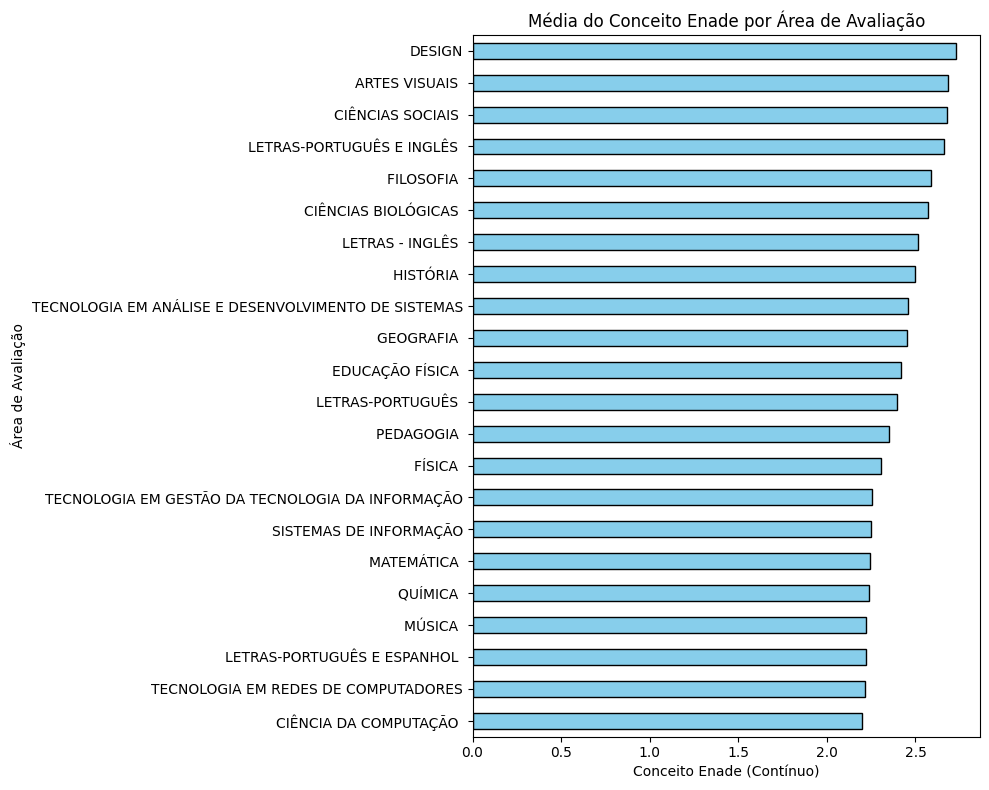

In [9]:
import matplotlib.pyplot as plt

enade_por_area = df.groupby('Área de Avaliação')['Conceito Enade (Contínuo)'].mean().sort_values()

plt.figure(figsize=(10, 8))
enade_por_area.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Média do Conceito Enade por Área de Avaliação')
plt.xlabel('Conceito Enade (Contínuo)')
plt.ylabel('Área de Avaliação')
plt.tight_layout()
plt.show()

Já avaliamos por curso, agora vamos avaliar por município

In [16]:
dfMunicipios = df.groupby(df.columns[13])
seriesMunicipios = dfMunicipios['Conceito Enade (Contínuo)']
print(seriesMunicipios.mean())

Sigla da UF** 
AC    1.922737
AL    1.824570
AM    1.840551
AP    1.861500
BA    2.380340
CE    2.315847
DF    2.596006
ES    2.788049
GO    2.061435
MA    1.993724
MG    2.608117
MS    2.132324
MT    1.834114
PA    1.874548
PB    2.354336
PE    2.132445
PI    2.015783
PR    2.515910
RJ    2.705237
RN    2.544737
RO    2.018031
RR    1.752722
RS    2.786650
SC    2.683921
SE    2.210908
SP    2.387722
TO    1.898031
Name: Conceito Enade (Contínuo), dtype: float64


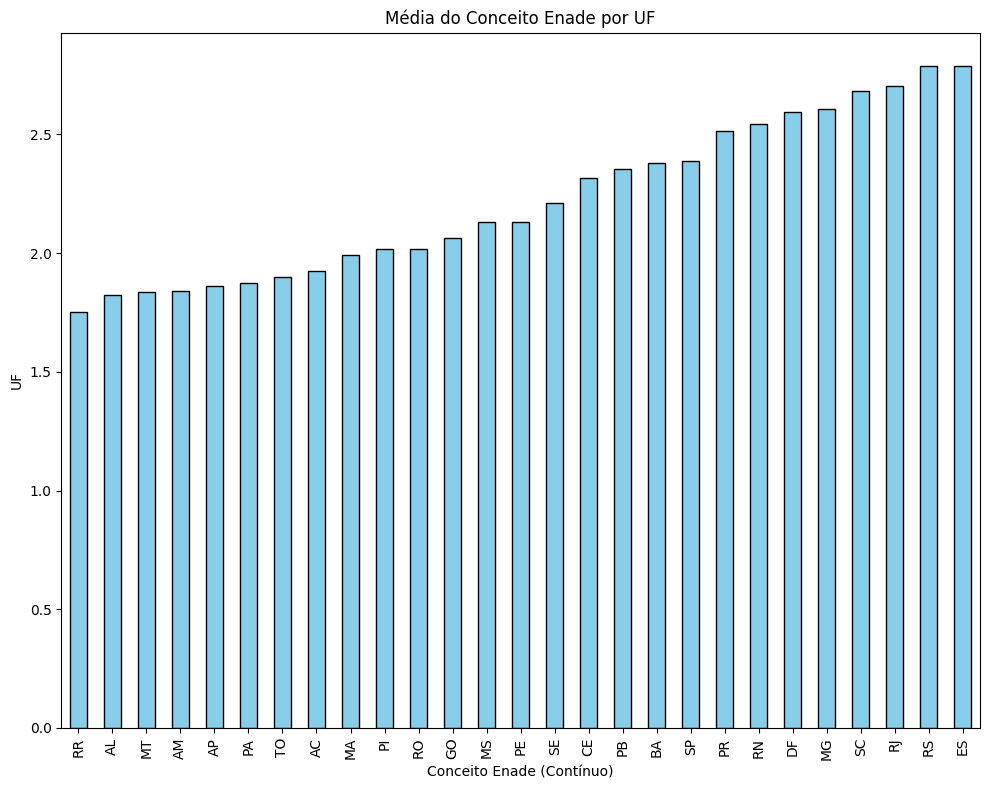

In [19]:
enade_por_UF = df.groupby(df.columns[13])['Conceito Enade (Contínuo)'].mean().sort_values()

plt.figure(figsize=(10, 8))
enade_por_UF.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Média do Conceito Enade por UF')
plt.xlabel('Conceito Enade (Contínuo)')
plt.ylabel('UF')
plt.tight_layout()
plt.show()

Será que há alguma diferença por conta grau acadêmico? Vamos descobrir

In [23]:
dfGrau = df.groupby(df.columns[3])
seriesGrau = dfGrau['Conceito Enade (Contínuo)']
print(seriesGrau.mean())

Grau Acadêmico
Bacharelado     2.416134
Licenciatura    2.397331
Tecnológico     2.380613
Name: Conceito Enade (Contínuo), dtype: float64
